In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
# Load the data
df = pd.read_csv('best_fitness_sublist_df.csv', index_col=None, header=0)
print(df.head())

              1            50           100           150           200  \
0  1.012580e+09  4.015700e+08  1.911345e+08  1.263395e+08  7.504538e+07   
1  1.122777e+09  3.303793e+08  1.575736e+08  8.865361e+07  4.922081e+07   
2  1.031069e+09  3.630222e+08  1.642306e+08  7.439767e+07  3.923539e+07   
3  9.836723e+08  3.180502e+08  1.624258e+08  8.727435e+07  5.016328e+07   
4  1.102873e+09  3.491527e+08  1.436240e+08  7.222991e+07  4.265573e+07   

            250           300           350           400           450  ...  \
0  4.220670e+07  2.630391e+07  1.548108e+07  7.401232e+06  4.123232e+06  ...   
1  2.710410e+07  1.541264e+07  9.302020e+06  6.141228e+06  3.485742e+06  ...   
2  2.206035e+07  1.096001e+07  6.268149e+06  2.983040e+06  1.654001e+06  ...   
3  2.692735e+07  1.600662e+07  8.112451e+06  5.042399e+06  2.306908e+06  ...   
4  2.257379e+07  9.441107e+06  5.692231e+06  2.921173e+06  1.697621e+06  ...   

             600            650            700            750       

In [15]:
# move df['Algorithm'] to the first column, df['Function'] to the second column
cols = list(df)
cols.insert(0, cols.pop(cols.index('Algorithm')))
cols.insert(1, cols.pop(cols.index('Function')))
df = df.loc[:, cols]
print(df.head())

  Algorithm Function             1            50           100           150  \
0  Baseline       F5  1.012580e+09  4.015700e+08  1.911345e+08  1.263395e+08   
1  Baseline       F5  1.122777e+09  3.303793e+08  1.575736e+08  8.865361e+07   
2  Baseline       F5  1.031069e+09  3.630222e+08  1.642306e+08  7.439767e+07   
3  Baseline       F5  9.836723e+08  3.180502e+08  1.624258e+08  8.727435e+07   
4  Baseline       F5  1.102873e+09  3.491527e+08  1.436240e+08  7.222991e+07   

            200           250           300           350  ...           500  \
0  7.504538e+07  4.220670e+07  2.630391e+07  1.548108e+07  ...  2.447383e+06   
1  4.922081e+07  2.710410e+07  1.541264e+07  9.302020e+06  ...  2.081471e+06   
2  3.923539e+07  2.206035e+07  1.096001e+07  6.268149e+06  ...  8.253245e+05   
3  5.016328e+07  2.692735e+07  1.600662e+07  8.112451e+06  ...  1.601107e+06   
4  4.265573e+07  2.257379e+07  9.441107e+06  5.692231e+06  ...  9.602213e+05   

            550            600        

In [16]:
# set [algorithm, function] as index
df.set_index(['Algorithm', 'Function'], inplace=True)
print(df.head())

                               1            50           100           150  \
Algorithm Function                                                           
Baseline  F5        1.012580e+09  4.015700e+08  1.911345e+08  1.263395e+08   
          F5        1.122777e+09  3.303793e+08  1.575736e+08  8.865361e+07   
          F5        1.031069e+09  3.630222e+08  1.642306e+08  7.439767e+07   
          F5        9.836723e+08  3.180502e+08  1.624258e+08  8.727435e+07   
          F5        1.102873e+09  3.491527e+08  1.436240e+08  7.222991e+07   

                             200           250           300           350  \
Algorithm Function                                                           
Baseline  F5        7.504538e+07  4.220670e+07  2.630391e+07  1.548108e+07   
          F5        4.922081e+07  2.710410e+07  1.541264e+07  9.302020e+06   
          F5        3.923539e+07  2.206035e+07  1.096001e+07  6.268149e+06   
          F5        5.016328e+07  2.692735e+07  1.600662e+07  8

In [17]:
df = df.stack()
print(df)

Algorithm  Function     
Baseline   F5        1      1.012580e+09
                     50     4.015700e+08
                     100    1.911345e+08
                     150    1.263395e+08
                     200    7.504538e+07
                                ...     
Baldwin    F21       250   -9.999687e+00
                     300   -9.999687e+00
                     350   -1.012543e+01
                     400   -1.012543e+01
                     450   -1.012543e+01
Length: 12000, dtype: float64


In [18]:
# rename the column name
df = df.reset_index()
df.rename(columns={'level_2': 'Iteration', 0: 'Best Fitness'}, inplace=True)

In [19]:
print(df.head())

  Algorithm Function Iteration  Best Fitness
0  Baseline       F5         1  1.012580e+09
1  Baseline       F5        50  4.015700e+08
2  Baseline       F5       100  1.911345e+08
3  Baseline       F5       150  1.263395e+08
4  Baseline       F5       200  7.504538e+07


In [20]:
print(len(df))

12000


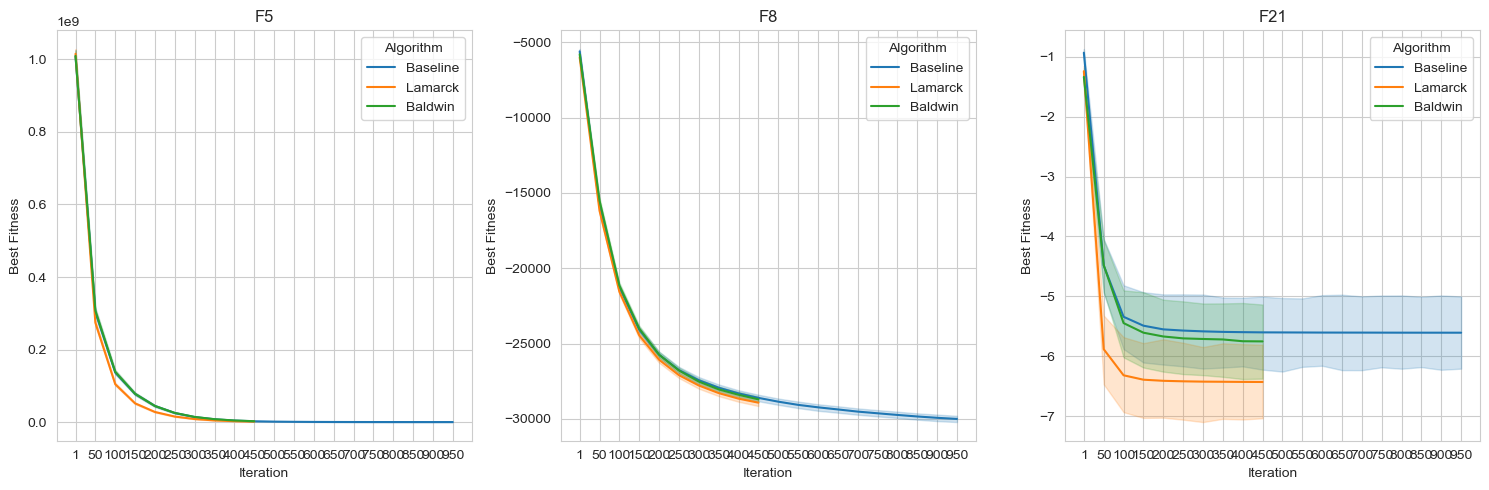

In [21]:
# make lineplot
cols = 3
rows = 1
plt.subplots(rows, cols, figsize=(15, 5))
for i, function in enumerate(df['Function'].unique()):
    plt.subplot(rows, cols, i+1)
    sns.lineplot(x='Iteration', y='Best Fitness', hue='Algorithm', data=df[df['Function'] == function])
    plt.title(function)
plt.tight_layout()
# do not show x ticks
# plt.setp(plt.gcf().get_axes(), xticks=[])
plt.savefig('picture1.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

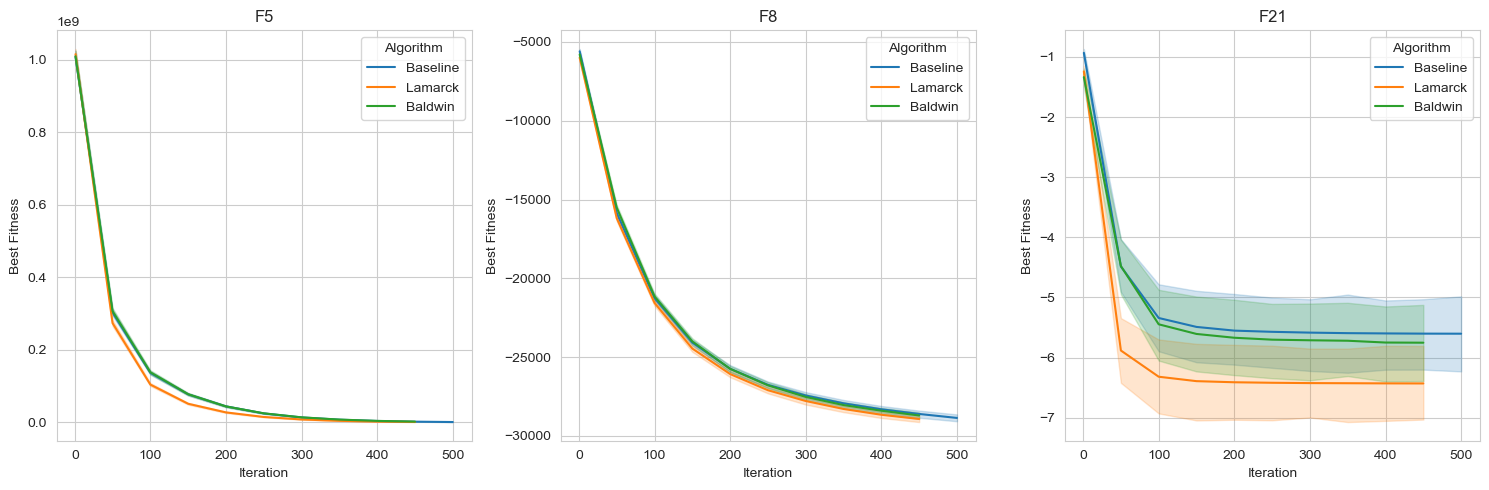

In [22]:
# filter out the first 100 iterations
df['Iteration'] = df['Iteration'].astype(int)
df = df[df['Iteration'] <= 10*50]
cols = 3
rows = 1
plt.subplots(rows, cols, figsize=(15, 5))
for i, function in enumerate(df['Function'].unique()):
    plt.subplot(rows, cols, i+1)
    sns.lineplot(x='Iteration', y='Best Fitness', hue='Algorithm', data=df[df['Function'] == function])
    plt.title(function)
plt.tight_layout()
plt.savefig('picture2.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

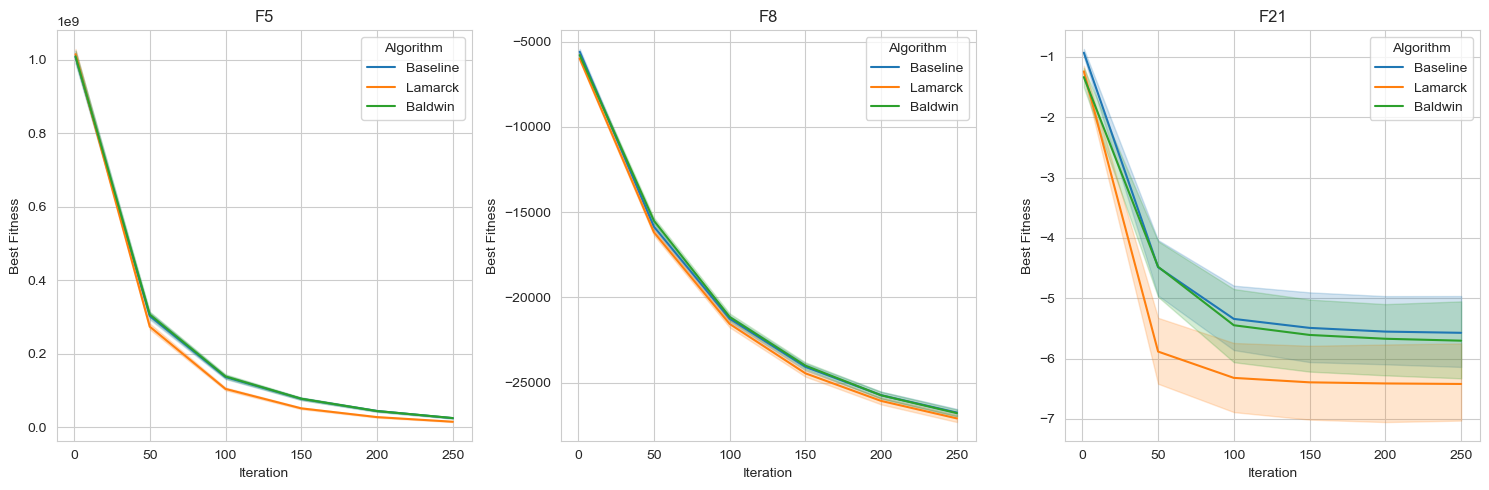

In [23]:
# filter out the first 100 iterations
df['Iteration'] = df['Iteration'].astype(int)
df = df[df['Iteration'] <= 5*50]
cols = 3
rows = 1
plt.subplots(rows, cols, figsize=(15, 5))
for i, function in enumerate(df['Function'].unique()):
    plt.subplot(rows, cols, i+1)
    sns.lineplot(x='Iteration', y='Best Fitness', hue='Algorithm', data=df[df['Function'] == function])
    plt.title(function)
plt.tight_layout()
plt.savefig('picture3.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

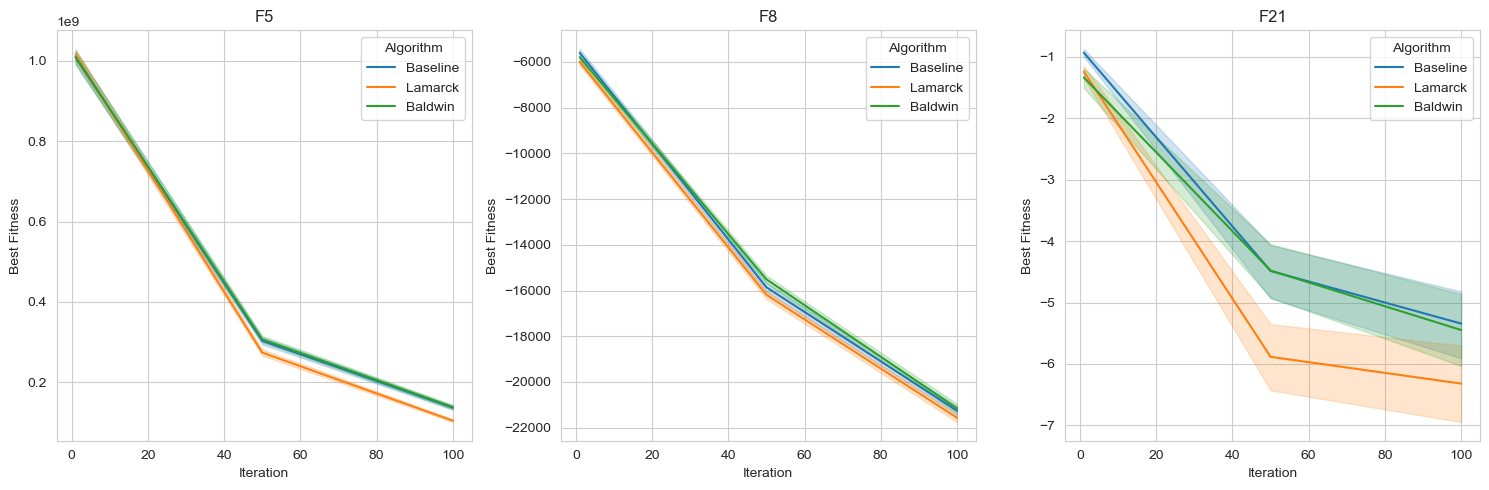

In [24]:
# filter out the first 100 iterations
df['Iteration'] = df['Iteration'].astype(int)
df = df[df['Iteration'] <= 2*50]
cols = 3
rows = 1
plt.subplots(rows, cols, figsize=(15, 5))
for i, function in enumerate(df['Function'].unique()):
    plt.subplot(rows, cols, i+1)
    sns.lineplot(x='Iteration', y='Best Fitness', hue='Algorithm', data=df[df['Function'] == function])
    plt.title(function)
plt.tight_layout()
plt.savefig('picture4.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()